<a href="https://colab.research.google.com/github/winnie9802/COMP6245/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Targets')

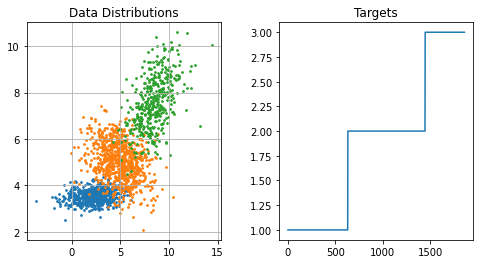

In [ ]:
#Approximating Bayes Posterior: Data
def genGaussianSamples(N, m, C):
  A = np.linalg.cholesky(C)
  U = np.random.randn(N,2)
  return(U @ A.T + m)

#Approximating Bayes Posterior:Data
import matplotlib.pyplot as plt
import numpy as np

NClasses = 3

#Priors 
#生成三组数的每组的数量
w = np.random.rand(NClasses) 
N = 1000 # total data(Training = Test)
NPrior = np.floor(w * N).astype(int)

#生成三组中心值
Scale = 10
Means = Scale*np.random.rand(NClasses,2)

#生成三组协方差矩阵
from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((NClasses,2,2))
for j in range(NClasses):
  CovMatrices[j,:,:] = make_spd_matrix(2)

#Generate three stacks of data
AllData = list()
for j in range(NClasses):
  AllData.append(genGaussianSamples(NPrior[j],Means[j,:],CovMatrices[j,:,:]))

X = AllData[0] #The value of the first matrix
y = np.ones((NPrior[0],1)) #Number of first matrix * 1 column
for j in range(NClasses-1): #j [-1,2) j+1 [0,3)
  Xj = genGaussianSamples(NPrior[j+1],Means[j+1,:],CovMatrices[j+1,:,:])
  X = np.append(X,Xj,axis=0)
  yj = (j+2)*np.ones((NPrior[j+1],1)) #yj是标签值从1到3
  y = np.append(y,yj) #Three label matrices add up to one column

# AllData_test = list()
# for j in range(NClasses):
#   AllData_test.append(genGaussianSamples(NPrior[j],Means[j,:],CovMatrices[j,:,:]))

# X_test = AllData_test[0]
# y_test = np.ones((NPrior[0],1))
# for j in range(NClasses-1):
#   Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:],CovMatrices[j+1,:,:])
#   X_test = np.append(X_test,Xj,axis=0)
#   yj = (j+2)*np.ones((NPrior[j+1],1))
#   y_test = np.append(y_test,yj)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
plt.subplots_adjust(wspace=0.3)
#分别画出三组数据
for j in range(NClasses):
  Xplt = AllData[j]
  ax[0].scatter(Xplt[:,0],Xplt[:,1],s=3)
ax[0].grid(True)
ax[0].set_title("Data Distributions")

ax[1].plot(y)
ax[1].set_title("Targets")

# for j in range(NClasses):
#   Xplt = AllData_test[j]
#   ax[2].scatter(Xplt[:,0], Xplt[:,1], s=3)
# ax[2].grid(True)
# ax[2].set_title("Test Data Distributions")

In [ ]:
#Approximating Bayes Posterior:MLP Training
#Encoding the output
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold  
import numpy as np  
#train_index denotes the sequence number of the training set, and test_index denotes the sequence number of the test set

kf = KFold(n_splits=10,shuffle=True)
AccSet = []
flag = 1
for train_index , test_index in kf.split(X):
  X_train = X[train_index, :]  #训练集的数据
  y_train = y[train_index]    #训练集的标签
  X_test = X[test_index, :]   #测试集的数据
  y_test = y[test_index]     #测试集的标签
  onehot_encoder = OneHotEncoder(sparse=False)
  y_onehot_train = onehot_encoder.fit_transform(y_train.reshape(-1,1))
  print("y_onehot_train:",y_onehot_train)
  y_onehot_test =  onehot_encoder.fit_transform(y_test.reshape(-1,1))

  #print(y_onehot_test) #变成三列标签值
  #Training a neural network
  #对网络进行训练
  from sklearn.neural_network import MLPClassifier
  if flag == 1:
    clf = MLPClassifier(hidden_layer_sizes=200,learning_rate_init=0.001,max_iter=50)
    clf.fit(X_train, y_onehot_train)
    flag = 0

  #Predictions, accuracy and confusion matrix
  #

  from sklearn.metrics import accuracy_score
  y_pred_test = clf.predict(X_test) #对网络进行预测
  temp = accuracy_score(y_onehot_test,y_pred_test)
  print(temp) #Accuracy of calculation
  AccSet.append(temp)

  # N_train = X_train.shape[0]
  # predicted_class_train = np.zeros((N_train,1))
  # for j in range(N_train):
  #   predicted_class_train[j] = (1+np.argmax(y_pred_train[j,:])).astype(int)

  # from sklearn.metrics import confusion_matrix
  # print("Confusion Matrix:")
  # print(confusion_matrix(y_train,predicted_class_train))

print(AccSet)
print(np.mean(AccSet))

y_onehot_train: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0.8655913978494624
y_onehot_train: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0.8709677419354839
y_onehot_train: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0.8709677419354839
y_onehot_train: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0.8978494623655914
y_onehot_train: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0.8763440860215054
y_onehot_train: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0.8548387096774194
y_onehot_train: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0.8655913978494624
y_onehot_train: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0.8817204301075269
y_onehot_train: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
0.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Text(0.5, 1.0, 'Data boundaries for MLP')

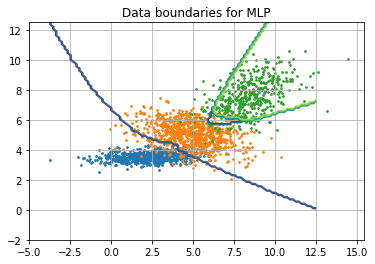

In [ ]:
#Draw boundries
import numpy as np

nx = 100
ny = 100
xx = np.linspace(-5, 12.5, nx) #generate x
yy = np.linspace(-2, 12.5, ny) #generate y
Xp, Yp = np.meshgrid(xx, yy, indexing='ij') 
num=0
Z=np.empty([nx*ny,2]) #Z保存所有的点
for i in range(nx):
  for j in range(ny):
    xvec = np.array([Xp[i,j], Yp[i,j]])
    Z[num,:] = xvec
    num=num+1
y_pred_test = clf.predict(Z)
N_train = Z.shape[0]
predicted_class_test = np.zeros((N_train,1))
for j in range(N_train):
  #找到预测的类
  predicted_class_test[j] = (1+np.argmax(y_pred_test[j,:])).astype(int)

num = 0
Zpp = np.empty([nx,ny])
for i in range(nx):
  for j in range(ny):
    Zpp[i,j] = predicted_class_test[num]
    num=num+1
plt.contour(Xp,Yp,Zpp,5)

for j in range(NClasses):
  Xplt = AllData[j]
  plt.scatter(Xplt[:,0],Xplt[:,1],s=3)
# plt.scatter(X_train[:,0],X_train[:,1])
plt.grid(True)
plt.title("Data boundaries for MLP")


In [ ]:
from sklearn.model_selection import KFold 
from sklearn.naive_bayes import GaussianNB 
import numpy as np  
#train_index 表示的是训练集的序号，test_index表示的是测试集的序号

kf = KFold(n_splits=10,shuffle=True)
AccSet2 = []
flag = 1
for train_index , test_index in kf.split(X):
  X_train2 = X[train_index, :]
  y_train2 = y[train_index]
  X_test2 = X[test_index, :]
  y_test2 = y[test_index]
#naive bayes
  if flag == 1:
    gnb = GaussianNB()
    gnb.fit(X_train2, y_train2)
    flag = 0

  y_pred_test2 = gnb.predict(X_test2)
  rs = y_test2 - y_pred_test2
  cnt = X_test2.shape[0] - np.count_nonzero(rs)
  print("Number of mislabeled points out of a total %d points : %d" % (X_test2.shape[0],cnt))
  temp=cnt/X_test2.shape[0]
  AccSet2.append(temp)

print(AccSet2)
print(np.mean(AccSet2))

Number of mislabeled points out of a total 193 points : 183
Number of mislabeled points out of a total 193 points : 173
Number of mislabeled points out of a total 193 points : 179
Number of mislabeled points out of a total 193 points : 172
Number of mislabeled points out of a total 193 points : 175
Number of mislabeled points out of a total 193 points : 172
Number of mislabeled points out of a total 193 points : 173
Number of mislabeled points out of a total 192 points : 170
Number of mislabeled points out of a total 192 points : 175
Number of mislabeled points out of a total 192 points : 179
[0.9481865284974094, 0.8963730569948186, 0.927461139896373, 0.8911917098445595, 0.9067357512953368, 0.8911917098445595, 0.8963730569948186, 0.8854166666666666, 0.9114583333333334, 0.9322916666666666]
0.9086679620034541


Text(0.5, 1.0, 'Data boundaries for GNB')

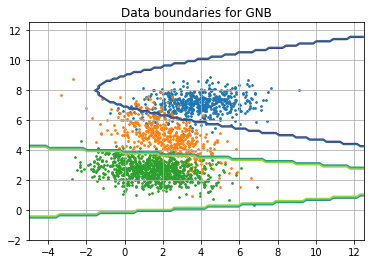

In [ ]:
#Draw boundries
import numpy as np

nx = 100
ny = 100
xx = np.linspace(-5, 12.5, nx) #generate x
yy = np.linspace(-2, 12.5, ny) #generate y
Xp, Yp = np.meshgrid(xx, yy, indexing='ij') 
num=0
Z=np.empty([nx*ny,2])
for i in range(nx):
  for j in range(ny):
    xvec = np.array([Xp[i,j], Yp[i,j]])
    Z[num,:] = xvec
    num=num+1
y_pred_test2 = gnb.predict(Z)
# N_train = Z.shape[0]
# predicted_class_test = np.zeros((N_train,1))
# for j in range(N_train):
#   predicted_class_test[j] = (1+np.argmax(y_pred_test[j,:])).astype(int)

num = 0
Zpp = np.empty([nx,ny])
for i in range(nx):
  for j in range(ny):
    Zpp[i,j] = y_pred_test2[num]
    num=num+1
plt.contour(Xp,Yp,Zpp,5)

for j in range(NClasses):
  Xplt = AllData[j]
  plt.scatter(Xplt[:,0],Xplt[:,1],s=3)
plt.grid(True)
plt.title("Data boundaries for GNB")


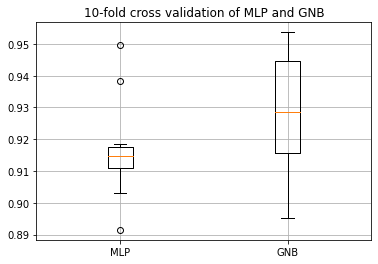

In [ ]:
import matplotlib.pyplot as plt

box1 = AccSet
box2 = AccSet2
labels = ['MLP','GNB']
plt.boxplot([box1,box2],labels=labels)
#plt.ylim([0.5,1])
plt.title("10-fold cross validation of MLP and GNB")
plt.grid(True)